In [2]:
import tensorflow as tf

print(tf.__version__)

2.13.0


## Import IMDB dataset

In [3]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

c:\Users\BACHLONG\anaconda3\envs\tensorflow-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)



In [14]:
print(len(train_data))
print(len(test_data))
print(training_labels_final)

25000
25000
[0 0 0 ... 0 0 1]


## Preprocessing

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

## Model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# Set up the training params
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the model
num_epochs = 10
history = model.fit(padded,
          training_labels_final,
          epochs=num_epochs,
          validation_data=(testing_padded, testing_labels_final))

# Print the model summary
model.summary()

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.2621 - val_accuracy: 0.7954
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 8.8633e-04 - accuracy: 0.9998 - val_loss: 1.3231 - val_accuracy: 0.7980
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4499e-04 - accuracy: 1.0000 - val_loss: 1.3479 - val_accuracy: 0.7954
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.0206e-05 - accuracy: 1.0000 - val_loss: 1.3509 - val_accuracy: 0.7967
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 6.4251e-06 - accuracy: 1.0000 - val_loss: 1.3585 - val_accuracy: 0.7969
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 4.8631e-06 - accuracy: 1.0000 - val_loss: 1.3676 - val_accuracy: 0.7972
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 3.7187e-06 - accuracy: 1.0000 - val_loss: 1.3794 - val

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


## Visualize

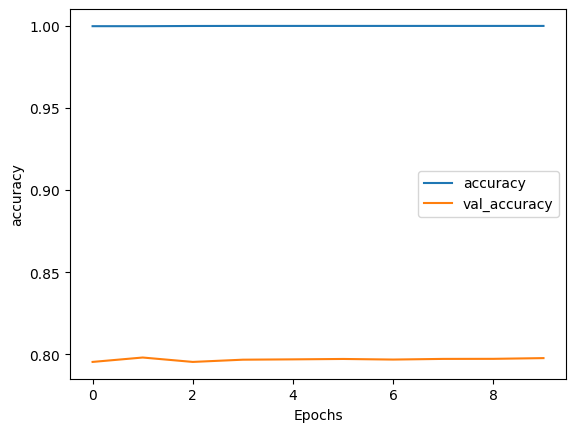

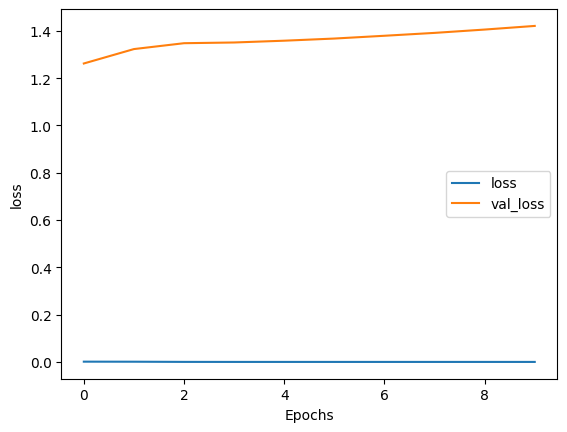

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = tokenizer.index_word

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf8')
out_m = io.open('meta.tsv', 'w', encoding='utf8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

## Subwords

In [ ]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer_subwork.encode(sample_string)
print('Tokenized string is', tokenized_string)

original_string = tokenizer_subwork.decode(tokenized_string)
